In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('presentation.mplstyle')

In [2]:
tracks = pd.read_csv("tracks3.csv",encoding ="ISO-8859-1")

In [3]:
tracks['distance_real'] = np.sqrt(tracks['X'].diff(1)**2+tracks['Y'].diff(1)**2)

In [4]:
tracks['velocity_real'] = tracks['distance_real']*1.725*6

In [5]:
tracks

,Track n°,Slice n°,X,Y,Distance,Velocity,Pixel Value,distance_real,velocity_real
0,1,1,357,1036,-1.000,-1.000,63,NaN,NaN
1,1,2,375,1022,2.942,1.471,99,22.803509,236.016313
2,1,3,386,1012,1.918,0.959,86,14.866069,153.863812
3,1,4,399,995,2.761,1.380,114,21.400935,221.499673
4,1,5,411,982,2.282,1.141,92,17.691806,183.110192
...,...,...,...,...,...,...,...,...,...
313,4,111,1944,1053,2.379,1.189,108,18.439089,190.844570
314,4,112,1962,1059,2.448,1.224,114,18.973666,196.377443
315,4,113,1984,1061,2.850,1.425,130,22.090722,228.638973
316,4,114,2002,1067,2.448,1.224,106,18.973666,196.377443


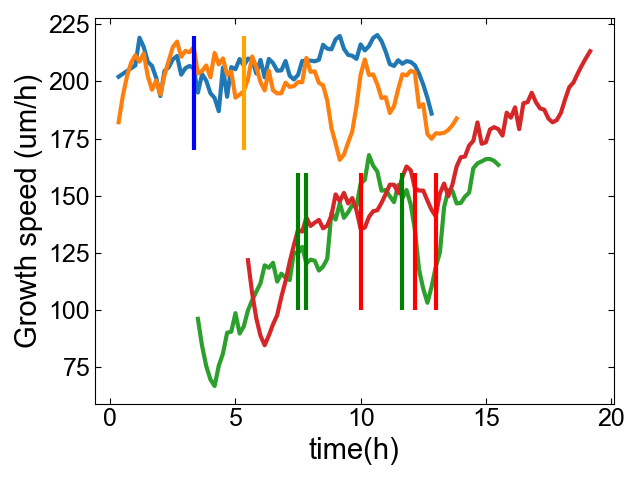

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
fig, ax = plt.subplots()

for i in [1, 2, 3, 4]:
# for i in [1, 2]:

    select = tracks[tracks["Track n°"] == i]
    
    slice_numbers = select["Slice n°"].values[1:]/6
    velocity_real = select["velocity_real"].values[1:]

    # Apply Savitzky-Golay smoothing filter
    smoothed_velocity = savgol_filter(velocity_real, window_length=10, polyorder=2)

    ax.plot(slice_numbers, smoothed_velocity, label="Smoothed Velocity")
    # ax.plot(slice_numbers, velocity_real, label="Original Velocity")

    ax.set_xlabel("time(h)")
    ax.set_ylabel("Growth speed (um/h)")
    # ax.set_title(f"Track {i} Velocity")
    # ax.legend()
ax.vlines(20/6,170,220,color = "blue")
ax.vlines(32/6,170,220,color = "orange")
ax.vlines(45/6,100,160,color = "green")
ax.vlines(47/6,100,160,color = "green")
ax.vlines(70/6,100,160,color = "green")
ax.vlines(60/6,100,160,color = "red")
ax.vlines(73/6,100,160,color = "red")
ax.vlines(78/6,100,160,color = "red")

plt.tight_layout()

plt.show()

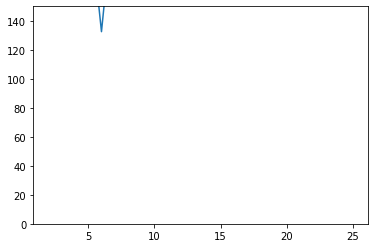

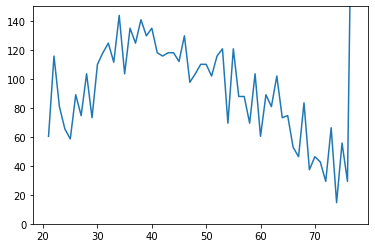

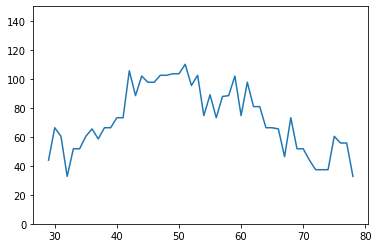

In [29]:
for i in [1,5,7]:
    fig,ax = plt.subplots()
    select = tracks[tracks["Track n°"]==i]
    ax.plot(select["Slice n°"].values[1:],select["velocity_real"].values[1:])
    ax.set_ylim(0,150)

In [31]:
import pandas as pd
import webbrowser

# Read the CSV file into a pandas DataFrame
csv_file = 'papers2.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the column containing URLs is named "ArticleURL"
urls = data['ArticleURL']

# Open each URL in the default web browser
for url in urls:
    webbrowser.open_new_tab(url)
